In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
data = pd.read_csv('/content/Advertising.csv')
data.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [5]:
data.shape

(200, 4)

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes[data.dtypes=='float64']

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

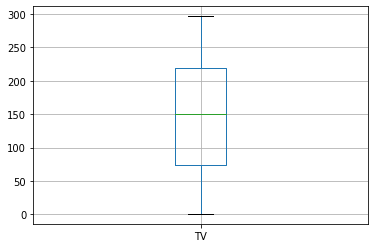

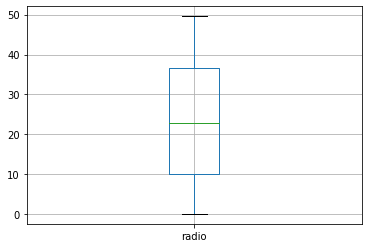

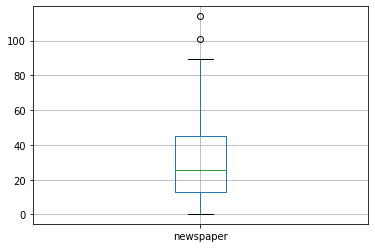

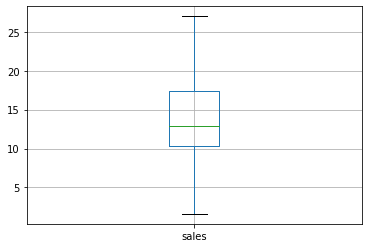

In [9]:
float_column = data.dtypes[data.dtypes=='float64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])

In [10]:
x = data.drop(['sales'],axis=1)

In [11]:
y = data['sales'].values.reshape(-1,1)

In [12]:
x.head(2)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [13]:
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


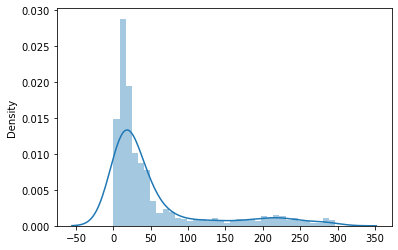

In [14]:
sns.distplot(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


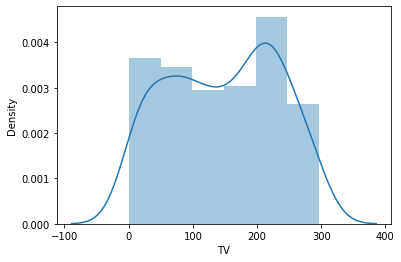

In [15]:
new = np.log10(data)
sns.distplot(data['TV'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


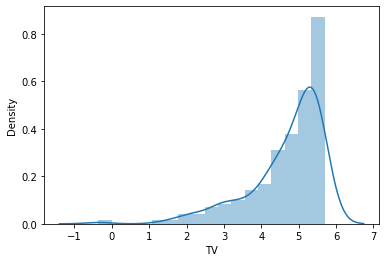

In [16]:
convert_to_log= np.log(data['TV'])
sns.distplot(convert_to_log)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


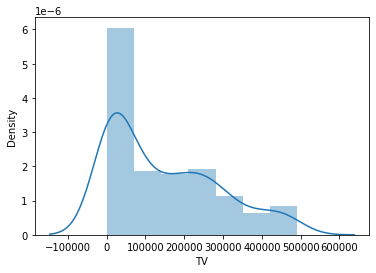

In [17]:
convert_to_orginal = (10**convert_to_log)
# print('convert_to_orginal:',convert_to_orginal)
sns.distplot(convert_to_orginal)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


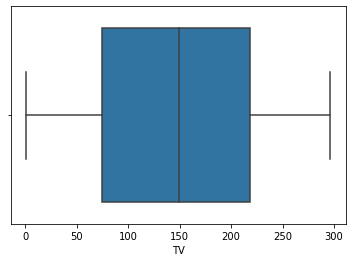

In [18]:
sns.boxplot(data['TV'])

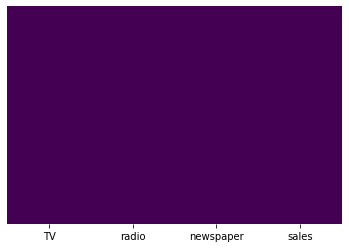

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
label_Encod = LabelEncoder()
x = x.apply(label_Encod.fit_transform)
x

,TV,radio,newspaper
0,153,131,159
1,32,136,124
2,12,156,160
3,98,142,149
4,112,41,148
...,...,...,...
195,28,18,44
196,63,21,23
197,111,35,20
198,181,145,158


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [63]:
sclr = StandardScaler()

In [64]:
x_train= sclr.fit_transform(x_train)

In [65]:
x_test= sclr.transform(x_test)

In [66]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((150, 3), (150, 1), (50, 3), (50, 1))

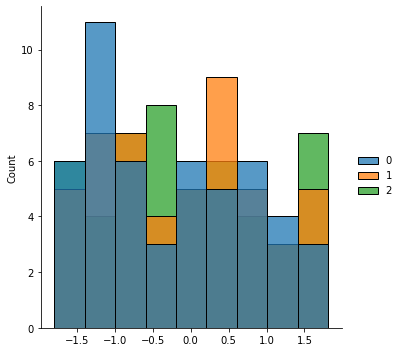

In [67]:
sns.displot(x_test)

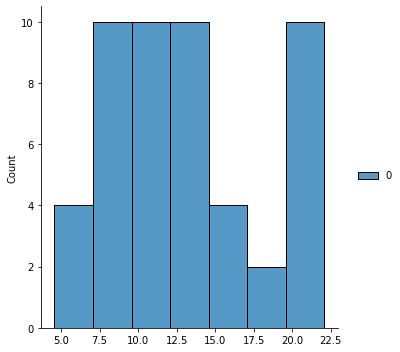

In [68]:
model = LinearRegression()
result= model.fit(x_train,y_train)
y_pred= result.predict(x_test)
sns.displot(y_pred)

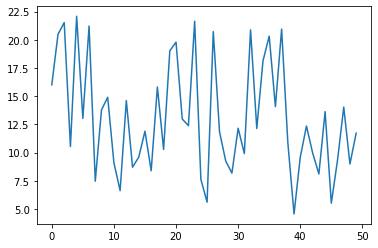

In [69]:
plt.plot(y_pred)

In [70]:
New_dataframe = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
New_dataframe

,Actual,Predicted
0,16.9,16.002523
1,22.4,20.480063
2,21.4,21.518723
3,7.3,10.532414
4,24.7,22.081221
5,12.6,13.023511
6,22.3,21.212161
7,8.4,7.464136
8,11.5,13.778657
9,14.9,14.901731


In [71]:
ac= model.score(x_test,y_test)
ac = ac*100
ac
ac = float("{0:.2f}".format(ac))
print('Accuracy is:',ac,'%')

Accuracy is: 89.33 %


In [72]:
mean_absolute_error(y_test,y_pred)

1.3941195657019383

In [73]:
 mean_squared_error(y_pred,y_test)

2.8857442038783625

In [74]:
math.sqrt(mean_squared_error(y_pred,y_test))

1.6987478341055693

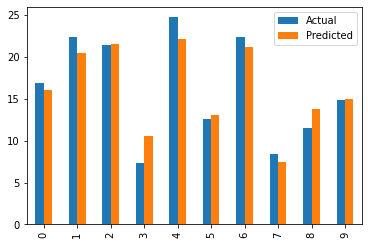

In [75]:
plot = New_dataframe.head(10)
plot.plot(kind ='bar')

In [76]:
result.coef_

array([[3.83088937, 2.84387379, 0.0737887 ]])

In [77]:
result.intercept_

array([14.30466667])

In [78]:
MSE= cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
MSE

array([-3.22738992, -2.51182543, -1.66778284, -5.41154908, -2.90535519])

In [79]:
MSE= cross_val_score(model,x,y,cv=5)
MSE

array([0.87513713, 0.91470648, 0.92564988, 0.81493853, 0.8912014 ])

In [80]:
mean_MSE = np.mean(MSE)
mean_MSE

0.8843266825512444

In [81]:
alpha = [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]

In [82]:
ridge=Ridge()

In [83]:
parameters = {'alpha':alpha}

In [84]:
ridge_rigressor = GridSearchCV(ridge,parameters)
ridge_rigressor.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
ridge_rigressor.best_params_

{'alpha': 1}

In [86]:
ridge_rigressor.best_score_

0.8687668883660482

In [87]:
ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [88]:
y_pred_ridge = ridge.predict(x_test)
y_pred_ridge
mean_squared_error(y_pred_ridge,y_test)

2.885264276655742

In [89]:
lasso =Lasso()

In [90]:
alpha = [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]

In [91]:
parameters = {'alpha':alpha}

In [92]:
lasso_rigressor = GridSearchCV(lasso,parameters)
lasso_rigressor.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.223692893884703, tolerance: 0.327688
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.29694459857316, tolerance: 0.3334871666666668
  positive)


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
lasso_rigressor.best_params_

{'alpha': 0.01}

In [94]:
lasso_rigressor.best_score_

0.8690656333520513

In [95]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso
mean_squared_error(y_pred_lasso,y_test)

2.8815429814752918

In [97]:
Ela = ElasticNet()

In [98]:
alpha = [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]

In [99]:
parameters = {'alpha':alpha}

In [100]:
Ela_rigressor = GridSearchCV(Ela,parameters)
Ela_rigressor.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.10787234080706, tolerance: 0.3334871666666668
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.62290372805532, tolerance: 0.30118099166666673
  positive)


GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
Ela_rigressor.best_params_

{'alpha': 0.01}

In [102]:
Ela_rigressor.best_score_

0.868921526086368

In [106]:
Ela = ElasticNet(alpha=0.01)
Ela.fit(x_train,y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
Ela_rigressor.best_params_

{'alpha': 0.01}

In [109]:
y_pred_Ela = Ela.predict(x_test)
y_pred_Ela
mean_squared_error(y_pred_Ela,y_test)

2.8833558661195844